## Regresión Lineal Múltiple

La regresión lineal múltiple es una extensión del concepto de regresión lineal simple que permite modelar la relación entre una variable de respuesta (también conocida como variable dependiente u objetivo) y múltiples variables predictoras (también conocidas como variables independientes o características). 

**La diferencia con la regresión lineal anterior es que ahora existen más de una variable predictiva, las cuales buscan estimar el valor de $y$.**

$$ \widehat{y} = w_0 + w_1 x_1 +  w_2 x_2 + ... + w_n x_n + ε$$

$$ \widehat{y} = W^T X $$


Donde: 

$ W^T = \begin{bmatrix}
w_0 &w_1 &w_2 &... &w_n 
\end{bmatrix} $ es la matriz de coeficientes o pesos.

$X = \begin{bmatrix}
1\\ 
x_1\\ 
x_2\\
...\\
x_n\\
\end{bmatrix}$ es la matriz de variables.

$ε$ es el término de error, que representa el "ruido" o variabilidad no explicada por el modelo.

En algunos modelos el término $ε$ es "ignorado" o se suma al valor de $w_0$ debido a que ambos son escalares o términos sin variables.


El objetivo de la regresión lineal múltiple es estimar los valores de los coeficientes de la matriz $W$ que minimizan la diferencia entre las predicciones del modelo y los valores reales. Esta regresión también usa el método de **Mínimos Cuadrados**, al igual que la regresión lineal simple.

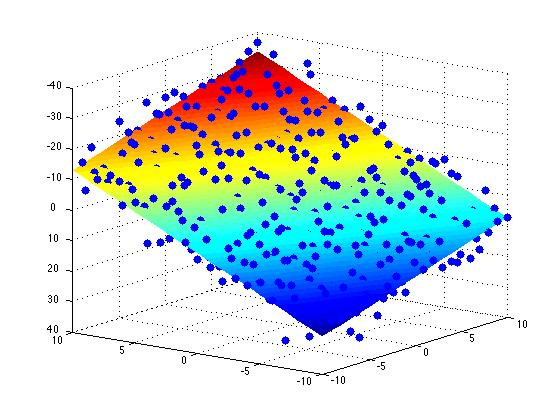

Para calcular esta recta aplicamos el algoritmo de **Mínimos Cuadrados** generalizado para $n$ dimensiones:

1. Construimos una matriz $X$ de tamaño $m$ (número de filas) y $n + 1$ (número de columnas, características y término independiente).


2. Contruimos la matriz de salida $y$, que será una matriz con los valores reales de cada fila.


3. Calculamos la matriz $W$ usando el algoritmo de **Mínimos Cuadrados** para $n$ dimensiones:

$$W = (X^TX)^{-1}X^Ty$$

Como resultado quería un vector con $n + 1$ dimensiones.

4. Definimos la recta de predicción de $n$ dimensiones:

$$\widehat{y} = W^TX$$

$$\widehat{y} = w_0 + w_1 x_1 +  w_2 x_2 + ... + w_n x_n$$

**La regresión lineal simple y la regresión multilineal se basan en los mismos conceptos y las mismas técnicas de evaluación.**

### **LIBRERÍAS NECESARIAS**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo
from sklearn.linear_model import LinearRegression

# Separar train y test
from sklearn.model_selection import train_test_split

# Métricas
# Sklearn tiene las formulas de algunas métricas en funciones.
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
df = pd.read_csv("../Data/FuelConsumptionCo2.csv")

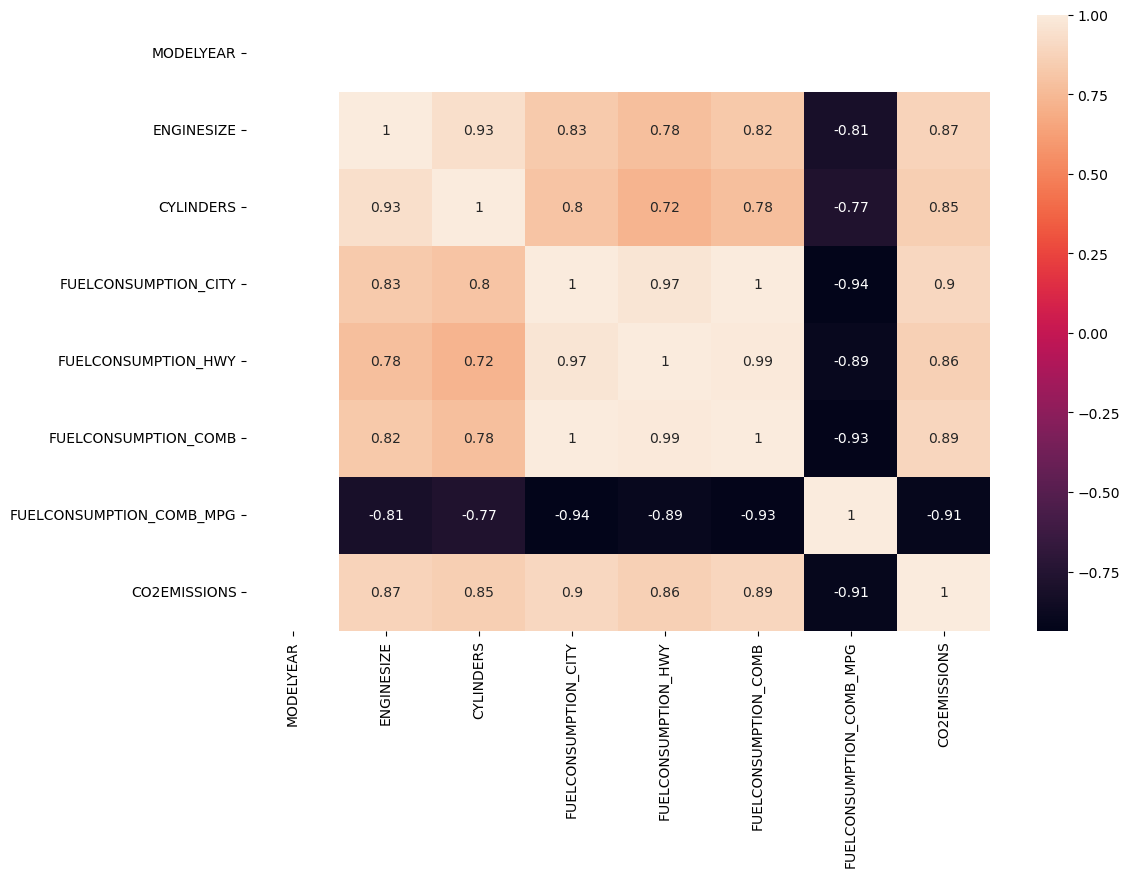

In [5]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df[["MODELYEAR", "ENGINESIZE", 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].corr(), annot = True)
plt.show()

### **SELECCIÓN DE LAS COLUMNAS MÁS CORRELACIONADAS PARA REGRESIÓN**

In [6]:
# Esta vez vamos a utilizar 3 columnas para predecir "CO2EMISSIONS"

df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]].head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2.0,4,9.9
1,2.4,4,11.2
2,1.5,4,6.0
3,3.5,6,12.7
4,3.5,6,12.1


### **SEPARACIÓN DE TRAIN Y TEST**

In [9]:
X = np.array(df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]])
y = np.array(df["CO2EMISSIONS"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((746, 3), (746,))
Conjunto de Test: ((321, 3), (321,))


### **ENTRENAMIENTO MODELO REGRESIÓN LINEAL**

In [10]:
# Algoritmo de regresión lineal de sklearn
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

weights: [11.31644307  5.92086631  8.51296695]
w_0: 71.1532293128945


### **PREDICCIONES**

In [15]:
y_hat = regresion_lineal.predict(X_test)

for i, j in zip(y_hat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:302.8071332808874 	Valor real:304
Predicción:242.48250447395037 	Valor real:221
Predicción:275.96342320171124 	Valor real:294
Predicción:237.67557963475693 	Valor real:221
Predicción:206.85573369076116 	Valor real:207


### **MÉTRICAS**

In [16]:
# Mean Absolute Error (MAE)
print(f"MAE: {mean_absolute_error(y_test, y_hat)}")
# Mean Squared Error (MSE)
print(f"MSE: {mean_squared_error(y_test, y_hat)}")
# Root Mean Squared Error (RMSE)
RMSE = math.sqrt(mean_squared_error(y_test, y_hat))
print(f"RMSE:\t {RMSE}")
# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, y_hat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
print(f"RAE: {RAE}")
# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, y_hat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
print(f"RSE: {RSE}")
# R squared
print(f"R**2: {r2_score(y_test, y_hat)}")
# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1) # Aquí usamos los datos tal y como usamos en el modelo (en este caso normalizados)
print(f"Adjusted R**2: {r2_ajustada}")

MAE: 16.604448793489883
MSE: 503.7112531770805
RMSE:	 22.44351249642267
RAE: 0.3187876411314423
RSE: 0.1248820195502965
R**2: 0.8751179804497035
Adjusted R**2: 0.8739361316842432


### **DIFERENCIAS ENTRE Y_TEST E Y_HAT**

In [43]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test (CO2COMISSION)"] = y_test.flatten()
df_pred["y_hat (CO2COMISSION)"] = y_hat.flatten()
df_pred["ENGINESIZE"] = X_test[:, 0].flatten()
df_pred["CYLINDERS"] = X_test[:, 1].flatten()
df_pred["FUELCONSUMPTION_CITY"] = X_test[:, 2].flatten()
# Diferencia en porcentaje
df_pred["diferencia"] = round(abs((df_pred['y_test (CO2COMISSION)'] - df_pred['y_hat (CO2COMISSION)']) / df_pred['y_test (CO2COMISSION)'] * 100), 4)

df_pred = df_pred.sort_values("diferencia").reset_index(drop=True)

df_pred.head(20)

,y_test (CO2COMISSION),y_hat (CO2COMISSION),ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,diferencia
0,224,224.054833,3.0,6.0,9.8,0.0245
1,196,196.079478,1.8,4.0,9.5,0.0406
2,207,206.855734,2.0,4.0,10.5,0.0697
3,380,380.361622,6.0,12.0,20.0,0.0952
4,212,212.233608,2.4,4.0,10.6,0.1102
5,207,207.406175,2.5,4.0,9.9,0.1962
6,244,244.485953,3.0,6.0,12.2,0.1992
7,331,330.298214,5.7,8.0,17.3,0.2120
8,255,254.400658,3.5,6.0,12.7,0.2350
9,255,254.400658,3.5,6.0,12.7,0.2350


In [48]:
def comparar_y_test_y_hat(y_test, y_hat):
    # Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (yhat)
    # Como dibujan casi una linea recta quiere decir que esta, parecidos
    plt.figure(figsize = (8, 5))

    sns.scatterplot(x = y_hat.flatten(), y = y_test.flatten(), alpha = 0.5, color = "blue")

    plt.xlabel("Valores Reales (y_test)", size = 18)
    plt.ylabel("Predicciones (y_hat)", size = 18)

    plt.show()

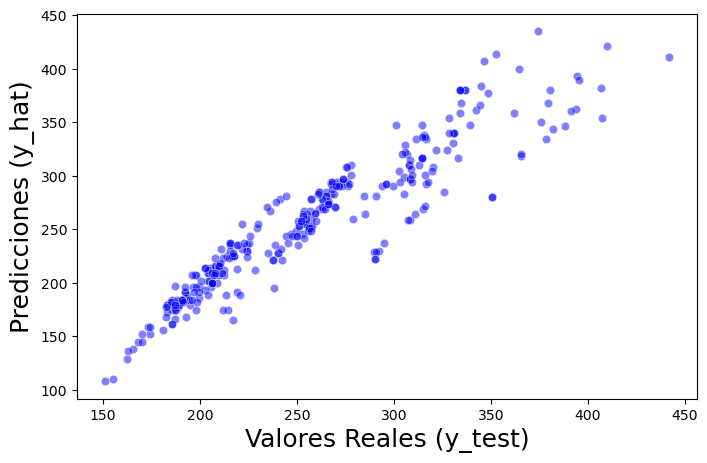

In [49]:
comparar_y_test_y_hat(y_test, y_hat)

In [35]:
def graficar_datos_predicciones(X_test, y_test, y_hat):

    plt.figure(figsize = (8, 5))

    plt.plot(X_test, y_test, marker = ".", linestyle = "", label = "y_test", alpha = 0.7, markersize=8)

    plt.plot(X_test, y_hat, marker = ".", linestyle = "", label = "y_hat", alpha = 0.7, markersize=4)

    plt.legend()
    plt.show()

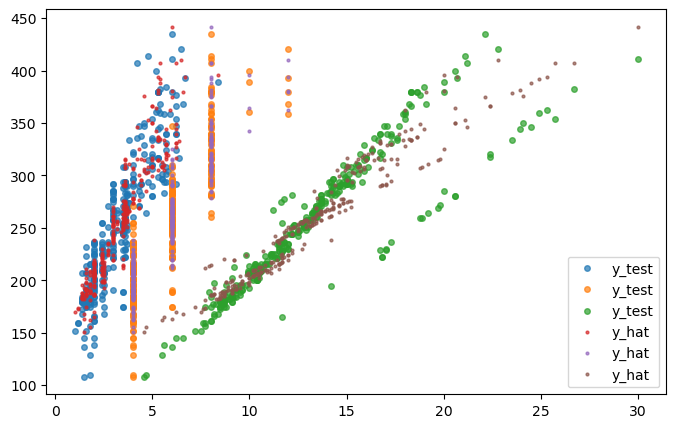

In [36]:
graficar_datos_predicciones(X_test, y_test, y_hat)

In [ ]:
################################################################################################################################